# Food Access Programs: Exploratory Analysis

The following project aims to understant food access challenges throughout US and to answer important questions such as:
Where should a food access program be depluyed?
Which segment of the population might benefit the most from the program?
What do we know about potential impact on medical costs or utilization?

There are many ways to analyze data that include access to food stores, access to food programs, poverty level, diet-related diseases (obesity and diabetes), race and other variables. The following analysis is based on medical autcomes. In here, we will use obesity and diabetes as a main indicators and general medical expenses (see data_preprocessing_cost.ipynb)

Data sources: 

FDA – Food Atlas - https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/

CMS – State/County Medicare Utilization Summary - https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Geographic-Variation/GV_PUF


In [1]:
# Import the necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
# Import the data 

df_food = pd.read_csv('assets/data_all_df.csv')
df_cost = pd.read_csv('assets/data_cost_df.csv')
df_food.head(5)

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,FSR11,FSR16,PCH_FSR_11_16,FSRPTH11,FSRPTH16,PCH_FSRPTH_11_16,PC_FFRSALES07,PC_FFRSALES12,PC_FSRSALES07,PC_FSRSALES12
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,32,31,-3.125000,0.579721,0.560802,-3.263448,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,216,236,9.259259,1.157966,1.137300,-1.784662,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,17,14,-17.647059,0.621549,0.543183,-12.608237,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,5,7,40.000000,0.219829,0.309283,40.692794,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,15,12,-20.000000,0.260589,0.208471,-20.000000,649.511367,674.80272,484.381507,512.280987


In [4]:
df_all= pd.merge(df_food, df_cost, on = 'FIPS', how='inner')


## Data Cleaning & Exploring 

The first step in the pipeline after importing is exploring the data. 
In this case and in the interest of time, I will do a limited version and focus the exploration to few columns. 
I will focus the analysis at the markers or proxis that may be associated obesity and diabetes (PCT_OBESE_ADULTS17 = Adult obesity rate, 2017 and PCT_DIABETES_ADULTS13 = Adult diabetes rate, 2009 ). 
Following a preliminar review of the literature, the parameters to consider are:

1) parameters related to access to food (location, household resources,goverment programs..)

2) parameters related to scioeconomic status (race, income level..)

3) parameters related to insecurity (race, poverty level..)

4) parameters related to assistance (lunch programs, ..)

5) parameters related to cost (total cost, total standarized cost..)


In [5]:
# Create a dataframe of values that are most interesting to food insecurity

columns_general = ['FIPS', 'State', 'County', "PCT_OBESE_ADULTS17", "PCT_DIABETES_ADULTS13"]

columns_access = ['LACCESS_POP10', 'LACCESS_POP15', 'PCH_LACCESS_POP_10_15',
                  'PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',
                  'LACCESS_LOWI10', 'LACCESS_LOWI15', 'PCH_LACCESS_LOWI_10_15',
                  'PCT_LACCESS_LOWI10', 'PCT_LACCESS_LOWI15',
                  'LACCESS_HHNV10', 'LACCESS_HHNV15', 'PCH_LACCESS_HHNV_10_15',
                  'PCT_LACCESS_HHNV10', 'PCT_LACCESS_HHNV15',
                  'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15',
                  'LACCESS_CHILD10', 'LACCESS_CHILD15', 'LACCESS_CHILD_10_15',
                  'PCT_LACCESS_CHILD10', 'PCT_LACCESS_CHILD15',
                  'LACCESS_SENIORS10', 'LACCESS_SENIORS15', 'PCH_LACCESS_SENIORS_10_15',
                  'PCT_LACCESS_SENIORS10', 'PCT_LACCESS_SENIORS15',
                  'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15',
                  'LACCESS_BLACK15', 'PCT_LACCESS_BLACK15',
                  'LACCESS_HISP15', 'PCT_LACCESS_HISP15',
                  'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15',
#                   'LACCESS_NHNA15', 'PCT_LACCESS_NHNA15',
#                   'LACCESS_NHPI15', 'PCT_LACCESS_NHPI15',
#                   'LACCESS_MULTIR15', 'PCT_LACCESS_MULTIR15'
                 ]
                  
columns_soc = ['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
               'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15','PERPOV10',
               'CHILDPOVRATE15', 'METRO13'] 
 
columns_insec = ['FOODINSEC_15_17','VLFOODSEC_15_17']
columns_assis = ['PCT_SNAP17','SNAP_PART_RATE16','PCT_FREE_LUNCH15','PCT_REDUCED_LUNCH15', 'PCT_WIC17']

columns_stores = ['GROCPTH16','SUPERCPTH16', 'FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18']

columns_cost = ['Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs' ]

dfcolumns = columns_general + columns_cost + columns_access + columns_soc + columns_insec + columns_assis + columns_stores


In [6]:
df = df_all[dfcolumns]


### Data description


In [7]:
# show dimensions
df.shape

(3139, 68)

In [8]:
# show statistics
df.describe

<bound method NDFrame.describe of        FIPS State      County  PCT_OBESE_ADULTS17  PCT_DIABETES_ADULTS13  \
0      1001    AL     Autauga                36.3                   13.0   
1      1003    AL     Baldwin                36.3                   10.4   
2      1005    AL     Barbour                36.3                   18.4   
3      1007    AL        Bibb                36.3                   14.8   
4      1009    AL      Blount                36.3                   14.1   
...     ...   ...         ...                 ...                    ...   
3134  56037    WY  Sweetwater                28.8                    8.1   
3135  56039    WY       Teton                28.8                    4.8   
3136  56041    WY       Uinta                28.8                    9.0   
3137  56043    WY    Washakie                28.8                   12.0   
3138  56045    WY      Weston                28.8                   10.0   

      Total_Actual_Costs  Total_Standardized_Costs  \

### Cleaning data

The first step is erasing rows with duplicate entries, ie same exact value for two different years, 2010 and 2015.  
Then,  missing values and -9999 are removed.


In [9]:
# erase the rows that have duplicate data on different years.
# by detecting when the difference is 0
check = df[df['PCH_LACCESS_POP_10_15'] == 0]
check.head()

,FIPS,State,County,PCT_OBESE_ADULTS17,PCT_DIABETES_ADULTS13,Total_Actual_Costs,Total_Standardized_Costs,Part_B_Drugs_Per_Capita_Actual_Costs,LACCESS_POP10,LACCESS_POP15,...,PCT_SNAP17,SNAP_PART_RATE16,PCT_FREE_LUNCH15,PCT_REDUCED_LUNCH15,PCT_WIC17,GROCPTH16,SUPERCPTH16,FMRKT18,FMRKTPTH18,PCT_FMRKT_FRVEG18
24,1049,AL,DeKalb,36.3,13.4,85035475.71,91486266.08,329.43,2679.852662,2679.852662,...,16.500056,86.898,55.351882,5.008183,2.543570,0.224669,0.014042,2.0,0.028017,0.0
72,2068,AK,Denali,34.2,5.8,353551.94,297993.57,121.80,1826.000014,1826.000014,...,12.045578,71.454,0.000000,0.000000,2.458541,0.488998,0.000000,0.0,0.000000,0.0
87,2230,AK,Skagway,34.2,6.4,NaN,NaN,NaN,2.999954,2.999954,...,12.045578,71.454,0.000000,0.000000,2.458541,0.000000,0.000000,0.0,0.000000,0.0
152,5089,AR,Marion,35.0,12.2,22886372.90,24905879.91,125.67,2255.376704,2255.376704,...,12.926965,72.327,62.897146,12.224017,2.546984,0.183273,0.061091,1.0,0.059801,100.0
155,5095,AR,Monroe,35.0,17.2,12678686.40,13115163.70,402.29,1020.247645,1020.247645,...,12.926965,72.327,91.184328,4.541407,2.546984,0.414651,0.000000,0.0,0.000000,0.0


In [10]:
# similar for other pair of values from 2010 and 2015: erase when diference is 0.00
df = df[df['PCH_LACCESS_POP_10_15'] != 0]
df = df[df['PCH_LACCESS_HHNV_10_15'] != 0]
df = df[df['PCH_LACCESS_SENIORS_10_15'] != 0]

In [11]:
#remove NaNs, 0s , and -9999
df = df.dropna(how='any')

df = df[df[df.columns] != -9999]


In [12]:
# drop columns that may not be as relevant

delete_list = ['LACCESS_POP10','PCH_LACCESS_POP_10_15','PCT_LACCESS_POP10',
               'LACCESS_LOWI10','PCH_LACCESS_LOWI_10_15','PCT_LACCESS_LOWI10',
               'LACCESS_HHNV10','PCH_LACCESS_HHNV_10_15','PCT_LACCESS_HHNV10',
               'LACCESS_CHILD10','LACCESS_CHILD_10_15','PCT_LACCESS_CHILD10', 
               'LACCESS_SENIORS10', 'PCH_LACCESS_SENIORS_10_15','PCT_LACCESS_SENIORS10']


for column in delete_list:
    del df[column]
    
# df.head()

In [13]:
# show dimensions
df.shape

(2556, 53)

## Explore data

To inspect the data I am checking correlations at the population level and the % of population.
It may be interesting to explore data at the population level if we are looking to impact the 
maximun number of people.

### Visualizations

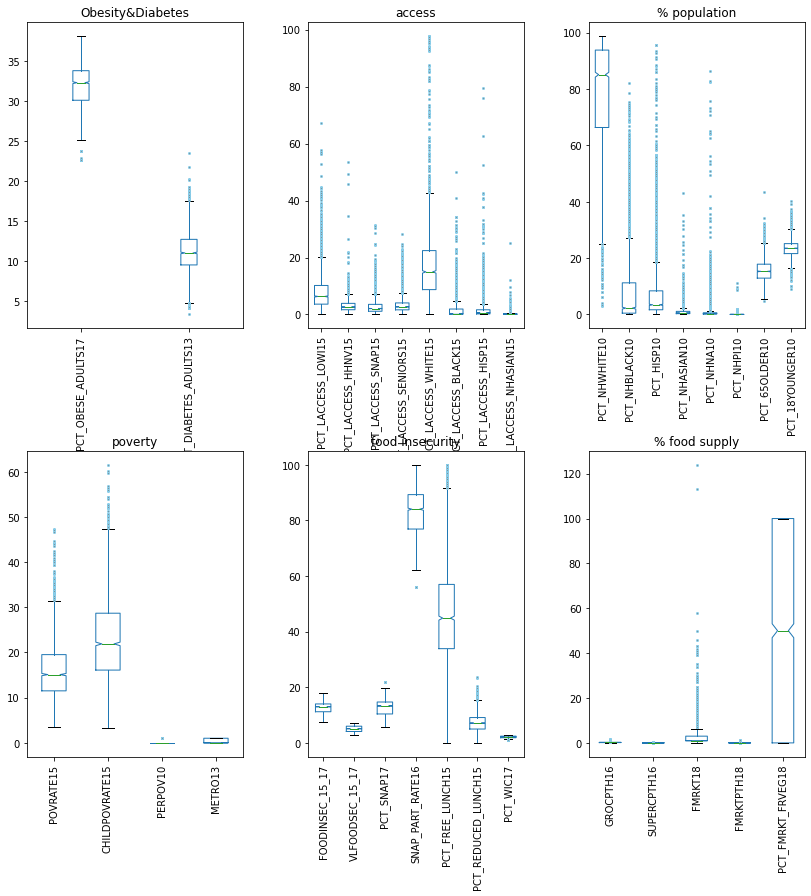

In [17]:
# Inspect the data: subset at the % level 
# Boxplot:distribution of % values

sb11=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13']
sb12=['PCT_LACCESS_LOWI15','PCT_LACCESS_HHNV15',
     'PCT_LACCESS_SNAP15','PCT_LACCESS_SENIORS15',
     'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15','PCT_LACCESS_HISP15',
     'PCT_LACCESS_NHASIAN15']
sb13=['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
     'PCT_65OLDER10','PCT_18YOUNGER10']
sb14=['POVRATE15', 'CHILDPOVRATE15', 'PERPOV10',
     'METRO13']
sb15=['FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17']
sb16=['GROCPTH16','SUPERCPTH16', 'FMRKT18',
      'FMRKTPTH18','PCT_FMRKT_FRVEG18']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))

flierprops = dict(marker='o', markerfacecolor='grey', 
                  markeredgecolor='skyblue',markersize=2,
                  linestyle='none')

axes[0, 0].boxplot= df.boxplot(sb11,ax=axes[0,0],grid=False,
                             rot=90, notch=True,flierprops=flierprops)
axes[0, 0].set_title('Obesity&Diabetes')

axes[0,1].boxplot = df.boxplot(sb12,grid=False, ax=axes[0,1],
                             rot=90, notch=True,flierprops=flierprops)
axes[0,1].set_title('access')

axes[0,2].boxplot =df.boxplot(sb13,grid=False, ax=axes[0,2],
                             rot=90, notch=True,flierprops=flierprops)
axes[0,2].set_title('% population')

axes[1,0].boxplot = df.boxplot(sb14,grid=False, ax=axes[1,0],
                             rot=90, notch=True,flierprops=flierprops)
axes[1,0].set_title('poverty')

axes[1,1].boxplot = df.boxplot(sb15,grid=False,ax=axes[1,1], 
                             rot=90, notch=True,flierprops=flierprops)
axes[1,1].set_title('food insecurity')

axes[1,2].boxplot = df.boxplot(sb16,grid=False, ax=axes[1,2],
                             rot=90, notch=True,flierprops=flierprops)
axes[1,2].set_title('% food supply')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# Set the axes ranges and axes labels
# axs.set( ylabel=' % ')                             
plt.savefig('assets/distribPerc.png')                             
plt.show()                                                    

# # Note: 

Some of the data is clearly skewed and a more detail analysis needs to be done. For example,'PCT_LACCESS_POP15' have values of percentage that are almost 100% which may be an artifact.


# Detecting outlayers
Detecting outlayers and deciding if they are the extreme cases that we are looking for or oulayers or artifacts.

[TO DO]


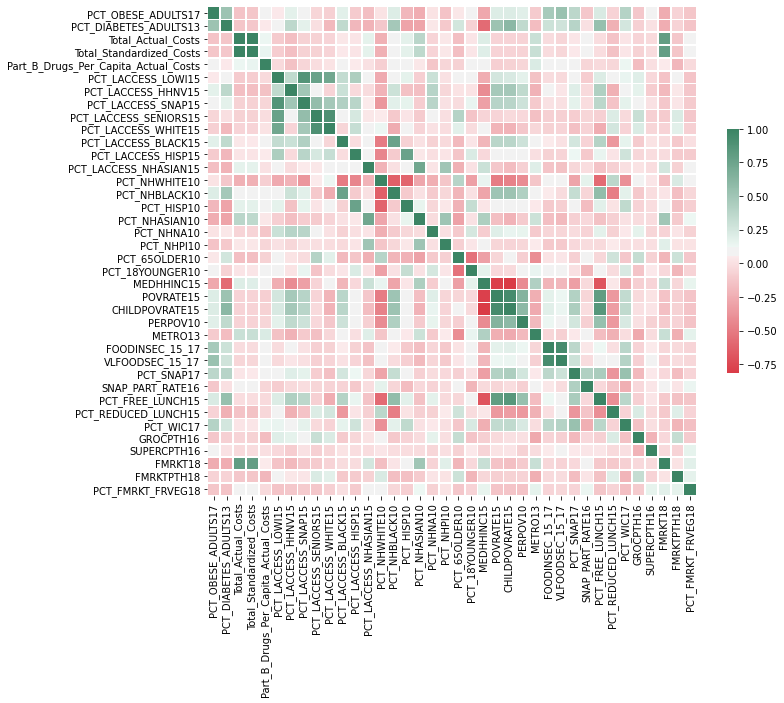

In [18]:
# correlation matrix with percent per county for some of the variables 

sb1=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13',
     'Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs',
     'PCT_LACCESS_LOWI15','PCT_LACCESS_HHNV15',
     'PCT_LACCESS_SNAP15','PCT_LACCESS_SENIORS15',
     'PCT_LACCESS_WHITE15', 'PCT_LACCESS_BLACK15','PCT_LACCESS_HISP15',
     'PCT_LACCESS_NHASIAN15',
     'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
     'PCT_65OLDER10','PCT_18YOUNGER10','MEDHHINC15',
     'POVRATE15', 'CHILDPOVRATE15', 'PERPOV10',
     'METRO13','FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17',
     'GROCPTH16','SUPERCPTH16','FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18',     
    ]

corr=df[sb1].corr()

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Add diverging colormap from red to blue
cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.heatmap(corr,cmap=cmap,
            square=True,
            linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.savefig('assets/correlationPerc.png')

plt.show()

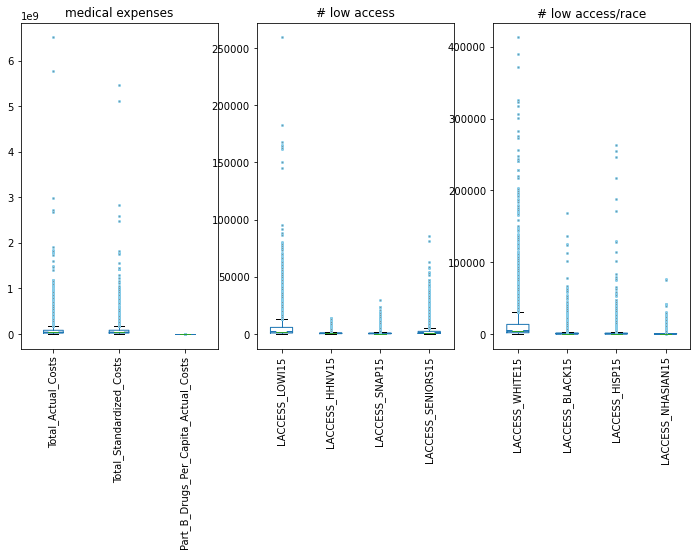

In [19]:
# Boxplot: distribution of variables including the total count per county

sb2=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13',
     'Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs',
     'LACCESS_LOWI15','LACCESS_HHNV15',
     'LACCESS_SNAP15','LACCESS_SENIORS15',
     'LACCESS_WHITE15', 'LACCESS_BLACK15','LACCESS_HISP15',
     'LACCESS_NHASIAN15',
     'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',     
     'PCT_65OLDER10','PCT_18YOUNGER10','MEDHHINC15',
     'POVRATE15', 'PERPOV10','CHILDPOVRATE15',
     'METRO13','FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17',
     'GROCPTH16','SUPERCPTH16', 'FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18']

sb21 = ['Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs']
sb22 = ['LACCESS_LOWI15','LACCESS_HHNV15','LACCESS_SNAP15','LACCESS_SENIORS15']
sb23 = ['LACCESS_WHITE15','LACCESS_BLACK15','LACCESS_HISP15','LACCESS_NHASIAN15']

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

flierprops = dict(marker='o', markerfacecolor='grey', 
                  markeredgecolor='skyblue',markersize=2,
                  linestyle='none')

ax1.boxplot= df.boxplot(sb21,grid=False, ax=ax1,
                             rot=90, notch=True,flierprops=flierprops)
ax1.set_title('medical expenses')

ax2.boxplot = df.boxplot(sb22,grid=False, ax=ax2,
                             rot=90, notch=True,flierprops=flierprops)
ax2.set_title('# low access')

ax3.boxplot =df.boxplot(sb23,grid=False, ax=ax3,
                             rot=90, notch=True,flierprops=flierprops)
ax3.set_title('# low access/race')
# Set the axes ranges and axes labels
# ax1.set(xlabel='variables', ylabel='# (and % for variables starting with "PCT")')                             
                             
plt.show()


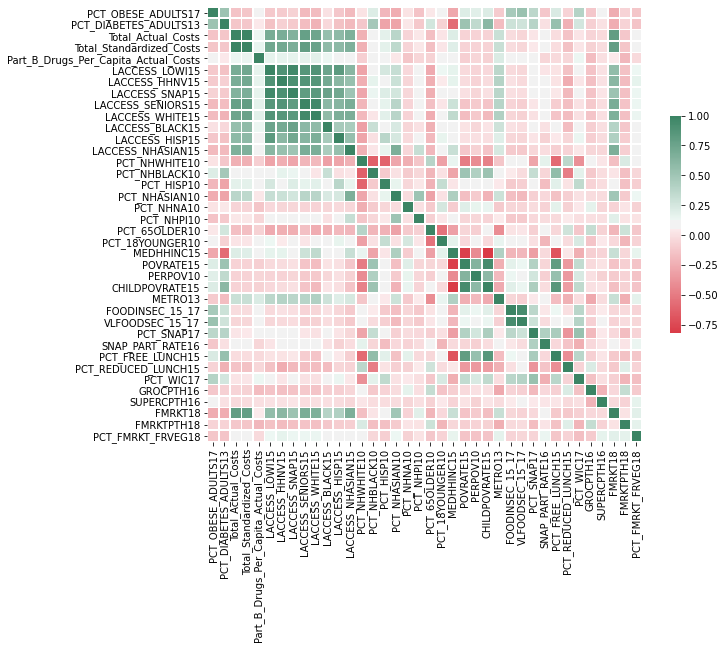

In [20]:
# Looking at the correlations total number instead of % for some of the variables 

sb2=['PCT_OBESE_ADULTS17','PCT_DIABETES_ADULTS13',
     'Total_Actual_Costs','Total_Standardized_Costs','Part_B_Drugs_Per_Capita_Actual_Costs',
     'LACCESS_LOWI15','LACCESS_HHNV15',
     'LACCESS_SNAP15','LACCESS_SENIORS15',
     'LACCESS_WHITE15', 'LACCESS_BLACK15','LACCESS_HISP15',
     'LACCESS_NHASIAN15',
     'PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10',
     'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',     
     'PCT_65OLDER10','PCT_18YOUNGER10','MEDHHINC15',
     'POVRATE15', 'PERPOV10','CHILDPOVRATE15',
     'METRO13','FOODINSEC_15_17','VLFOODSEC_15_17','PCT_SNAP17',
     'SNAP_PART_RATE16','PCT_FREE_LUNCH15', 'PCT_REDUCED_LUNCH15',
     'PCT_WIC17',
     'GROCPTH16','SUPERCPTH16', 'FMRKT18','FMRKTPTH18','PCT_FMRKT_FRVEG18']

corr=df[sb2].corr()

# Set up  matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Add diverging colormap from red to blue
cmap = sns.diverging_palette(10, 150, as_cmap=True)

sns.heatmap(corr,cmap=cmap,
            square=True,
            linewidth=.5, cbar_kws={"shrink": .5}, ax=ax,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.savefig('assets/correlationCount.png')

plt.show()


### There are many interesting correlations 

Obesity has a positive correlation with % of household with food insecurity, FOODINSEC_15_17, and very low food insecurity, VLFOODSEC_15_17, and food insecurity also seems to be correlated to percentage of WIC participants,PCT_WIC17.

Low income and low access to stores has not distiction to race. Low income and low access to stores it also correlates to no car & low access to store. 

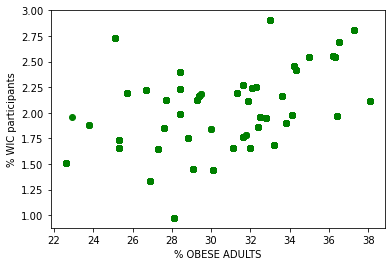

In [21]:
# If we look at markers of diabetes and obesity both have a positive association
# with food insecurity and the precense of programs like WIC
# Generate a scatter plot of year versus violent crime rate

x = df.iloc[:,3]
y = df.iloc[:,47]
plt.scatter(x,y, color='green' )
plt.xlabel('% OBESE ADULTS')
plt.ylabel('% WIC participants')

plt.show()

In [23]:
df.columns

Index(['FIPS', 'State', 'County', 'PCT_OBESE_ADULTS17',
       'PCT_DIABETES_ADULTS13', 'Total_Actual_Costs',
       'Total_Standardized_Costs', 'Part_B_Drugs_Per_Capita_Actual_Costs',
       'LACCESS_POP15', 'PCT_LACCESS_POP15', 'LACCESS_LOWI15',
       'PCT_LACCESS_LOWI15', 'LACCESS_HHNV15', 'PCT_LACCESS_HHNV15',
       'LACCESS_SNAP15', 'PCT_LACCESS_SNAP15', 'LACCESS_CHILD15',
       'PCT_LACCESS_CHILD15', 'LACCESS_SENIORS15', 'PCT_LACCESS_SENIORS15',
       'LACCESS_WHITE15', 'PCT_LACCESS_WHITE15', 'LACCESS_BLACK15',
       'PCT_LACCESS_BLACK15', 'LACCESS_HISP15', 'PCT_LACCESS_HISP15',
       'LACCESS_NHASIAN15', 'PCT_LACCESS_NHASIAN15', 'PCT_NHWHITE10',
       'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10',
       'PCT_NHPI10', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15',
       'POVRATE15', 'PERPOV10', 'CHILDPOVRATE15', 'METRO13', 'FOODINSEC_15_17',
       'VLFOODSEC_15_17', 'PCT_SNAP17', 'SNAP_PART_RATE16', 'PCT_FREE_LUNCH15',
       'PCT_REDUCED_LUNCH15', 'PC

In [37]:
df.columns[29]

'PCT_NHBLACK10'

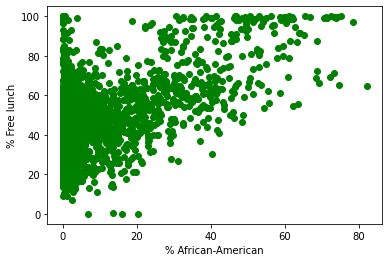

In [38]:

# There is a positive trend between elegibility for free lunches and percent
# of african american population, but negative correlation with 
# reduced lunches. 

x = df.iloc[:,29]
y = df.iloc[:,45]
plt.scatter(x,y, color='green' )
plt.xlabel('% African-American')
plt.ylabel('% Free lunch')

plt.show()

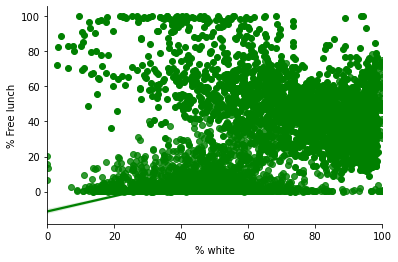

In [39]:
# The higher the percentage of white population the lower the free school lunches. 

x = df.iloc[:,28]
y = df.iloc[:,45]
plt.scatter(x,y, color='green' )
plt.xlabel('% white')
plt.ylabel('% Free lunch')

plt.show()


## Model and predictions

The following steps in the pipeline will be finding feature that are related.One quick way is to use VIF, variable inflation factors. 
VIF determines the strenght of the correlation between variables. 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_corr = df[sb2]
X = df_corr.iloc[:,:-1]
calc_vif(X)

Those variables with a coeficient closer to 1 are not correlated with the other variables. The higher the number the higher the collinearity of the particular variable and the rest.
This step will help to eliminate variables and also consider if two variables could be convined.

In [ ]:
df2 = df_corr.copy()
df2['poverty_rate'] = df.apply(lambda x: x['CHILDPOVRATE15'] + x['POVRATE15'],axis=1)
X = df2.drop(['CHILDPOVRATE15','POVRATE15',],axis=1)
calc_vif(X)

## Multiple regression

Idealy a variable like obesity and diabetes can be conbined and used to do a regression with some of the parameters related to cost. 
 
For example, if diabetes and obesity ara positively correlated with low acces to stores then having a better channel for food distribution will have a measurable impact. 



## Geographical locations

To look for a more specific locations one posible approach is using 
few weigthed parameters and set up a system of scores based on the 
quantile distributions of different relevant parameters.

For example, if model predicts association with variables such us poverty rate, SNAP deploiment, WIC utilization .. those features can be weigthed and fed back to each county to calculate an score base on the deviation of the number and prediction. 
The counties with the higher score could be proposed as a condidates for the intervention.